# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

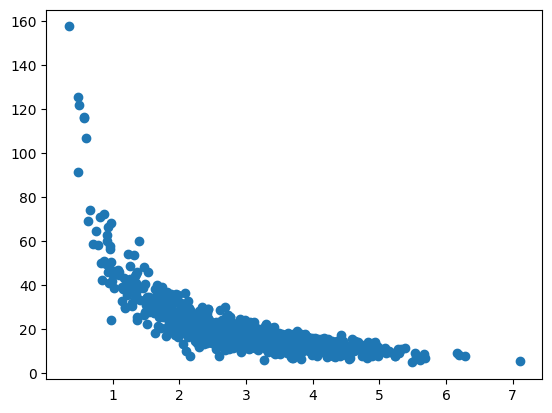

In [3]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(2)#garante que os graficos sejam reproduziveis
pageSpeeds = np.random.normal(3.0, 1.0, 1000) #cria a velocidade de paginas com numeros 1000 aleatorios com média 3 e desvio padrão 1
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds# cria uma relacao inversa, dividindo os 1000 numeros com meia 5 e desvio padrao 10 pela velocidade de pagina

scatter(pageSpeeds, purchaseAmount)#plota o grafico 

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [4]:
x = np.array(pageSpeeds)#transforma a velocidade de pagina em um array atraves do numpy para facilitar os calculos
y = np.array(purchaseAmount)#faz a mesma coisa com os valores de compras

p4 = np.poly1d(np.polyfit(x, y, 4))#ajuste polinomial de 4 grau


We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

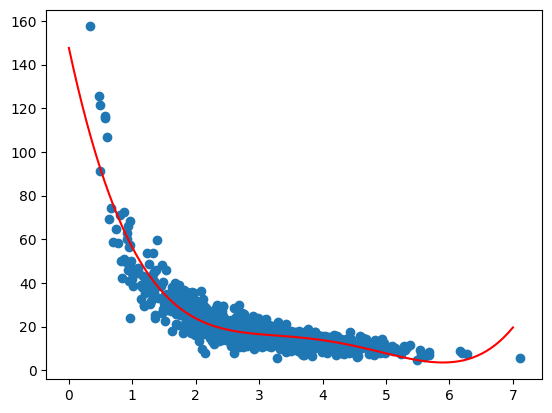

In [5]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100) #gera 100 pontos uniformemente distribuidos no intervalo de 0 a 7
plt.scatter(x, y)#plota os dados da linha x e y
plt.plot(xp, p4(xp), c='r')#plota a curva do polinomio de grau 4
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [6]:
from sklearn.metrics import r2_score#calcula o coeficiente de determinação (Rˆ2)

r2 = r2_score(y, p4(x))#faz o calculo do valor de Rˆ2, comparando os valores reais de y com os valores previstos pela função polinomial

print(r2)


0.8293766396303073


## Activity

Try different polynomial orders. Can you get a better fit with higher orders? Do you start to see overfitting, even though the r-squared score looks good for this particular data set?

Grau 1: Rˆ2 = 0.5025


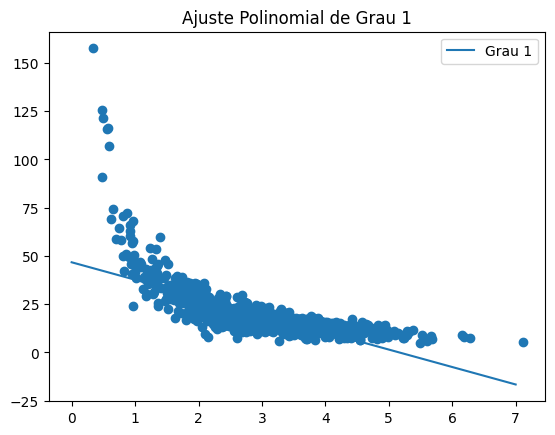

Grau 2: Rˆ2 = 0.6927


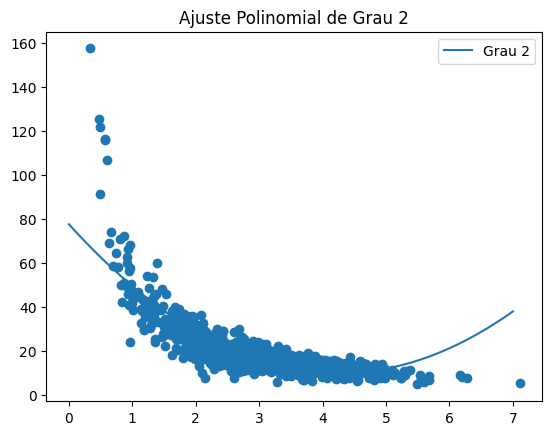

Grau 3: Rˆ2 = 0.7842


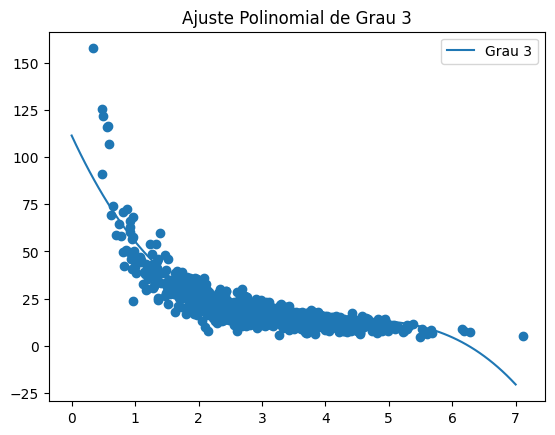

Grau 4: Rˆ2 = 0.8294


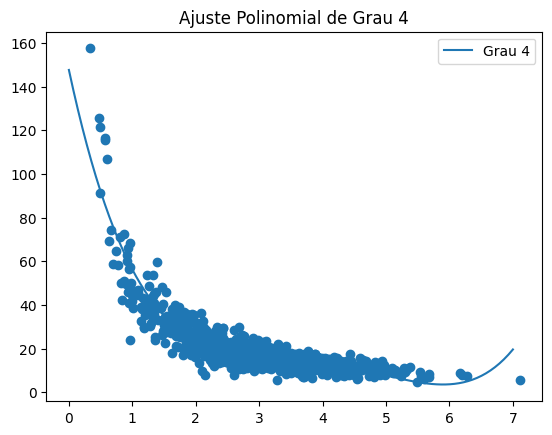

Grau 5: Rˆ2 = 0.8554


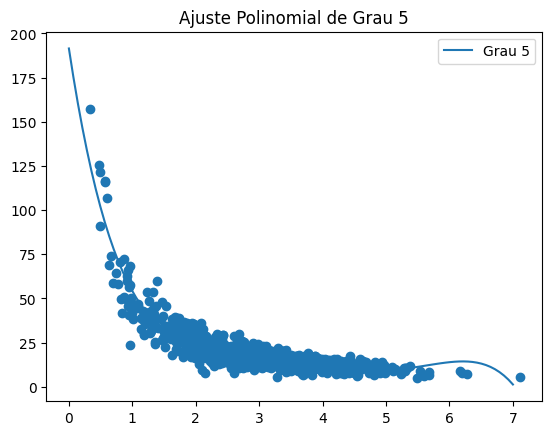

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Ajuste um polinômio de grau 1 ate 5
for degree in range(1, 6):  #testa os polinomios de grau 1 a 5
    # ajusta o polinomio aos dados
    p = np.poly1d(np.polyfit(x, y, degree))
    
    # Calcula o Rˆ2
    r2 = r2_score(y, p(x))
    print(f"Grau {degree}: Rˆ2 = {r2:.4f}")
    
    # Gera os pontos para o gráfico
    xp = np.linspace(0, 7, 100)
    fitLine = p(xp)
    
    # Plota os graficos
    plt.scatter(x, y)  # Dados reais
    plt.plot(xp, fitLine, label=f"Grau {degree}")  # Linha de ajuste polinomial
    plt.title(f"Ajuste Polinomial de Grau {degree}")
    plt.legend()
    plt.show() 
